In [4]:
import cv2
import matplotlib.pyplot as plt

In [31]:
import numpy as np

In [11]:
img_path = "0a1a7f395.jpg"

In [16]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

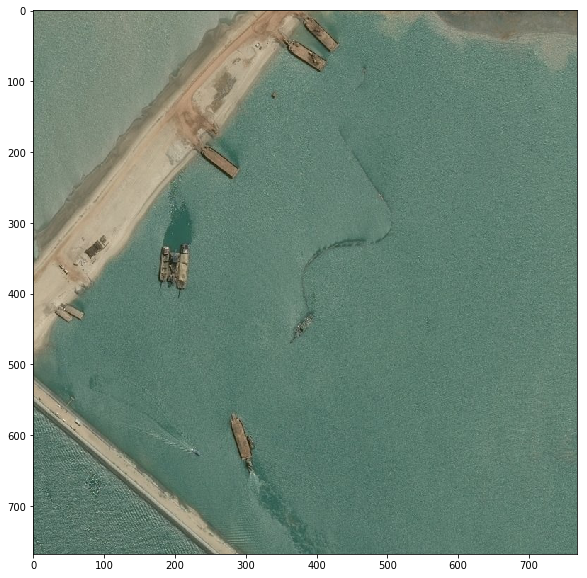

In [18]:
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

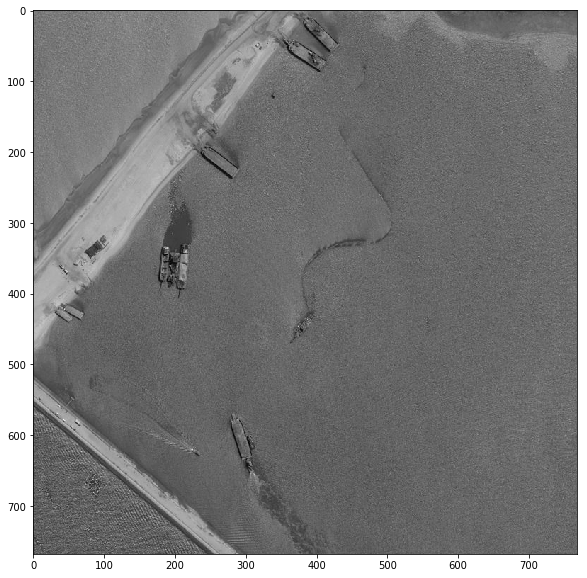

In [21]:
plt.figure(figsize=(15,10))
plt.imshow(gray, cmap="gray")
plt.show()

In [22]:
# GAUSSIAN BLUR PARAMETERS
kernel_size = 21

In [23]:
blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

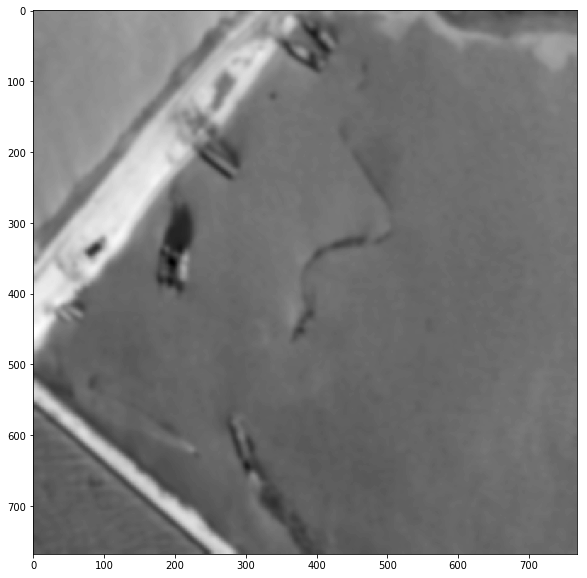

In [24]:
plt.figure(figsize=(15,10))
plt.imshow(blur, cmap="gray")
plt.show()

In [25]:
blend = cv2.divide(gray, 255-blur, scale=256)

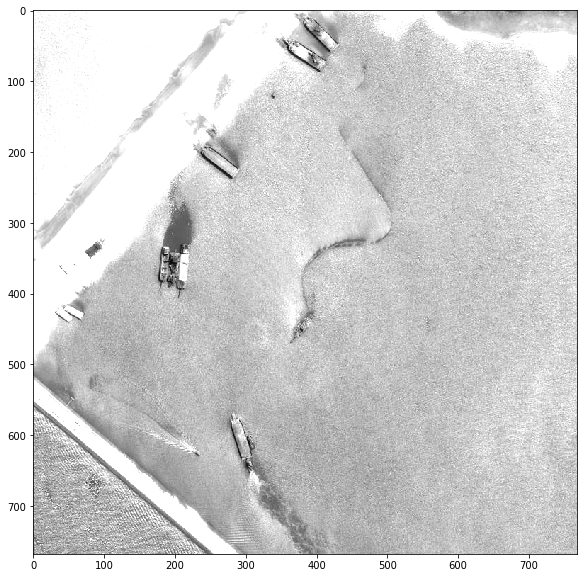

In [26]:
plt.figure(figsize=(15,10))
plt.imshow(blend, cmap="gray")
plt.show()

In [27]:
# CANNY EDGE DETECTION PARAMETERS
low_threshold = 80
high_threshold = 160 

In [28]:
edges = cv2.Canny(blend, low_threshold, high_threshold)

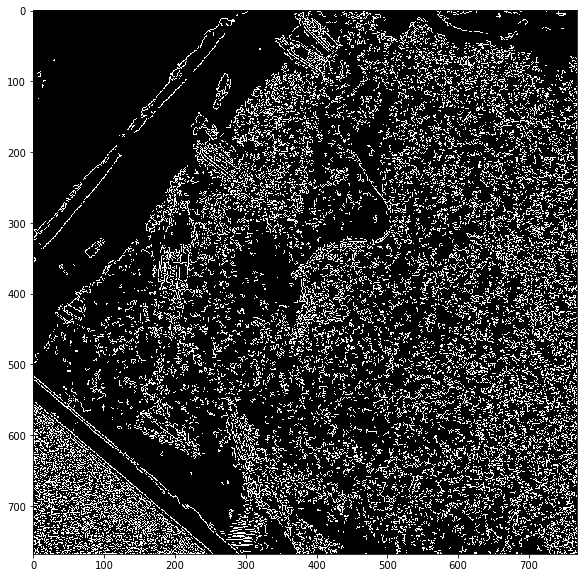

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(edges, cmap="gray")
plt.show()

In [33]:
# HOUGH LINES PARAMETERS
rho = 2
theta = np.pi/180 
threshold = 9
min_line_len = 50
max_line_gap = 10  

In [34]:
# draw lines on image
line_image = np.copy(img)*0
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_len, max_line_gap)

In [37]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [39]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

In [41]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)     

In [43]:
def convertToLaneRetain(rgb_threshold, image, color_select):
    # Identify pixels below the threshold
    thresholds = (image[:,:,0] < rgb_threshold[0]) \
                | (image[:,:,1] > rgb_threshold[1]) \
                | (image[:,:,2] > rgb_threshold[2])
    color_select[thresholds] = [0,0,0]
    return color_select

In [45]:
# Define our color selection criteria
# Great number for both yellow and white lane
red_threshold = 255
green_threshold = 0
blue_threshold = 0 
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [46]:
#Convert color point to only solid black and white
black = np.copy(combo) #copy combo
black = convertToLaneRetain(rgb_threshold, combo, black) #Keep only red color
split_black = np.copy(black[:,:,0])

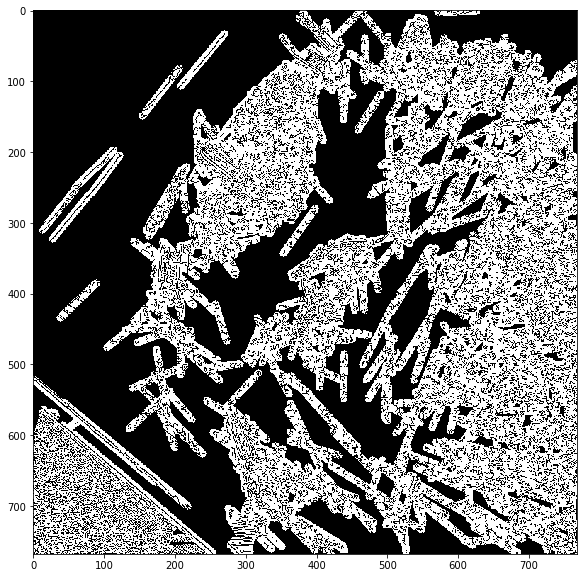

In [47]:
plt.figure(figsize=(15,10))
plt.imshow(split_black, cmap="gray")
plt.show()